# LS123: Large N and Hypothesis Testing

This lab will cover the basics of statistical sampling, the law of averages, and hypothesis testing. You should gain an intuition around how samples relate to populations, and the basics of statistical inference in the social sciences.

In [73]:
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('fivethirtyeight')

## Data

We'll continue using the ANES data for this lab!

In [74]:
anes = pd.read_csv('../data/anes/ANES_legalst123_cleaned.csv')
anes.head()

,Unnamed: 0,pre_election_weight_ftf,post_election_weight_ftf,pre_voting_status,pre_economy_last_year,pre_party_id,pre_gun_access_importance,pre_unauthorized_immigrants,pre_birthright_citizenship,pre_govt_assist_to_blacks,...,post_discrim_christian,post_discrim_transgender,post_discrim_personal,post_skintone,post_discrim_skintone,post_support_trump,post_gender,post_age_est,post_inform_level,post_intelligence
0,0,0.887,0.927,3,5.0,7.0,2.0,3.0,4.0,7.0,...,4.0,4.0,NaN,3.0,4.0,NaN,NaN,NaN,4.0,4.0
1,1,1.160,1.084,3,3.0,6.0,1.0,1.0,1.0,7.0,...,4.0,1.0,NaN,3.0,4.0,NaN,NaN,NaN,1.0,2.0
2,2,0.416,0.398,1,3.0,3.0,2.0,1.0,7.0,7.0,...,2.0,1.0,NaN,2.0,4.0,NaN,NaN,NaN,4.0,3.0
3,3,0.385,0.418,4,3.0,5.0,1.0,3.0,4.0,5.0,...,3.0,2.0,NaN,4.0,4.0,NaN,NaN,NaN,2.0,2.0
4,4,0.693,0.726,3,3.0,3.0,1.0,3.0,6.0,7.0,...,2.0,3.0,NaN,2.0,5.0,NaN,NaN,NaN,4.0,3.0


In [75]:
# see those variable names again
anes.columns.values

array(['Unnamed: 0', 'pre_election_weight_ftf',
       'post_election_weight_ftf', 'pre_voting_status',
       'pre_economy_last_year', 'pre_party_id',
       'pre_gun_access_importance', 'pre_unauthorized_immigrants',
       'pre_birthright_citizenship', 'pre_govt_assist_to_blacks',
       'pre_affirmative_action', 'pre_crime_budget', 'pre_welfare_budget',
       'pre_childcare_budget', 'pre_aid_to_poor_budget',
       'pre_environment_budget', 'pre_troops_to_fight_isis',
       'pre_syrian_refugees', 'pre_trust_washington',
       'pre_interests_of_few_or_many', 'pre_govt_waste_tax_money',
       'pre_govt_corruption', 'pre_are_people_trustworthy',
       'pre_govt_attention', 'pre_global_warming',
       'pre_govt_action_rising_temp',
       'pre_govt_services_same_sex_couples', 'pre_transgender_policy',
       'pre_lgbt_protection_laws', 'pre_gay_marriage', 'pre_abortion',
       'pre_death_penalty', 'pre_economy_since_2008',
       'pre_angry_at_obama', 'pre_proud_of_obama',
     

## Empirical Distributions

### Data Manipulation and Plotting Review

Let's look at how liberal respondents characterized themselves as post-election. Write code that saves the "post_liberal_rating" column in the ANES data to a Series variable. Keep in mind that valid answers have domain [0,100] so be sure to subset to only those values.

In [76]:
# here is one way of making sure that all the values are in range
ftliberals = np.clip(anes.loc[:,'post_liberal_rating'], 0, 100)
type(ftliberals)

pandas.core.series.Series

Plot a histogram of the data:

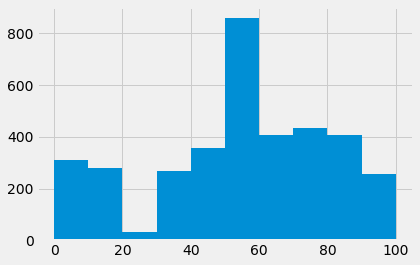

In [77]:
ftliberals.hist()

### Question 1

What patterns do you notice? Where is the center of the distribution? What does this suggest about how Americans tend to self-identify?

**Answer: There is a mode around 50 but the rest of the distribution is almost uniform, which makes sense. Most voters have a hard time deciding exactly what the ideological label means, and so most are sort of neutral. Other groups generate stronger affect.**

### Law of Averages

Write a function, "empirical_hist_anes" that takes a Series and a sample size as its argument, and then draws a histogram based on the results. Consult Adhikari and DeNero for help!

In [78]:
def empirical_hist_anes(series, n):
    sample = series.sample(n)
    return sample.hist()


Check how many rows are in the table with the "size" method, and then use your self-defined function to plot histograms taking sample sizes 10, 100, 1000, and the total number of rows.

In [79]:
# find the size of the dataframe
print(anes.shape)

(4271, 206)


Text(0.5,1,'Sample size of 10')

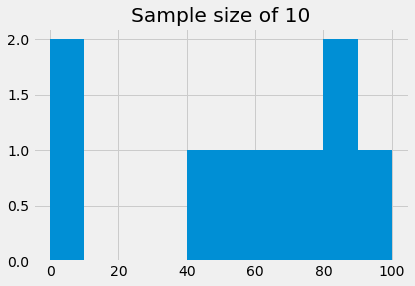

In [80]:
# use the empirical_hist_anes function to plot histograms of columns with various sample sizes
empirical_hist_anes(ftliberals, 10)
plot.title('Sample size of 10')

Text(0.5,1,'Sample size of 100')

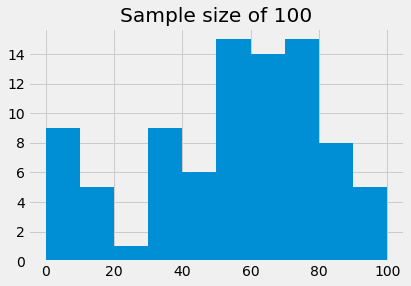

In [81]:
empirical_hist_anes(ftliberals, 100)
plot.title('Sample size of 100')

Text(0.5,1,'Sample size of 1000')

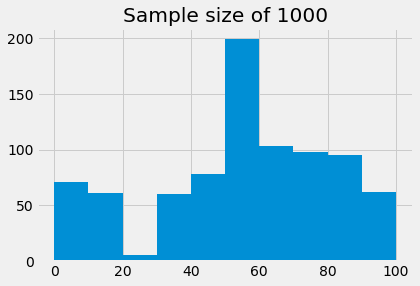

In [82]:
empirical_hist_anes(ftliberals, 1000)
plot.title('Sample size of 1000')

Text(0.5,1,'Sample size of 4271')

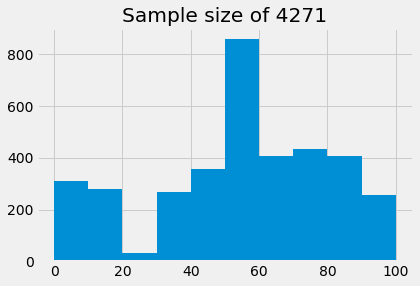

In [83]:
empirical_hist_anes(ftliberals, 4271)
plot.title('Sample size of 4271')

### Question 2

What happens to the histograms (compared to the original in Q1) as you increase the sample size? How does this relate to the Law of Averages? What is the relationship between sample size and population parameter estimation?

Answer: **As the sample size gets bigger, the smoother the histogram and the closer the shape of the histogram gets to the 'population' histogram above. If the Law of Averages is the law of large numbers, then yes the larger the sample the better the estimation of the underlying population distribution**

## Hypothesis Testing

In this section, we'll cover the basic tools for hypothesis testing. 

The goal in conducting a hypothesis test is to answer the question, "Was it likely to observe my test statistic due to chance?" We say something is statistically significant if it is sufficiently far enough away from the center of an empirical distribution, and therefore unlikely to have occurred just by chance.

The basic way to frame a hypothesis test is as follows:

1. Define a null $(H_O)$ and alternative $(H_A)$ hypothesis. The null hypothesis is usually framed as "no statistical relationship between the observed data and the background distribution" and the alternative hypothesis is the opposite. More concretely, the null is our default position, and assumes that the observed statistic likely came from the background distribution.

2. Calculate a test statistic (for example, t-test, $\chi^2$, etc.)

3. Check if the test statistic is far enough away from the center of the distribution. Traditionally, this was done by checking against a reference table, but in Python, we'll use p-values. Typically, a p value of less than .05 (meaning that only 5% of observations should fall where the test statistic does) is used as the threshold for statistical significance in the social sciences.

4. Either reject or fail to reject the null hypothesis.

### Jury Selection

First, we'll use the jury selection example from the Adhikari and DeNero book. This example is based on the U.S. Supreme Court case, Swain v. Alabama. Robert Swain was convicted by an all-white jury, and challenged his conviction on the basis that it was statistically unlikely that a jury would be all-white by chance, given that the racial composition of the county was 26% black. Juries were selected from a panel of 100. In this case, only 8 jurors on the panel were black.

Was it likely that the panel would only include 8 black jurors out of 100, given that 26% of the county was black?

In [84]:
# Create the table
jury = pd.DataFrame(data = {'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
                           'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
                           'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}
)

jury

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


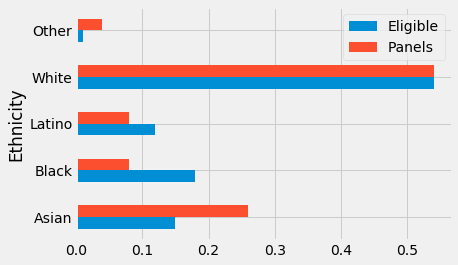

In [85]:
# Horizontal Bar Chart
jury.plot.barh(x='Ethnicity')

In [86]:
# Augment with the difference between the "panels" columns and "eligible" column
jury_with_diffs = jury.assign(Difference = jury.loc[:, 'Panels'] - jury.loc[:, 'Eligible'])
jury_with_diffs

,Ethnicity,Eligible,Panels,Difference
0,Asian,0.15,0.26,0.11
1,Black,0.18,0.08,-0.10
2,Latino,0.12,0.08,-0.04
3,White,0.54,0.54,0.00
4,Other,0.01,0.04,0.03


Write code that does a t-test between the "Eligible" and "Panels" columns. Hint: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

In [87]:
# scipy t-test
eligible_proportion = jury_with_diffs.loc[:,'Eligible']
panel_proportion = jury_with_diffs.loc[:,'Panels']
stats.ttest_ind(eligible_proportion,panel_proportion)

Ttest_indResult(statistic=0.0, pvalue=1.0)

** this result seems implausible; a t statistic of zero? **

In [88]:
stats.chisquare(panel_proportion, f_exp=eligible_proportion, ddof=0, axis=0)

Power_divergenceResult(statistic=0.23955555555555558, pvalue=0.9933745210604547)

** OK, maybe it is plausible that the panel proportions came from the underlying population of eligible proportions, given how the Chi sq test looks. It just does not seem like the underlying population would yield panels like that**

### Hypothesis Testing on ANES Data

Now let's try with the ANES data! Write code that creates a new DataFrame with the "post_liberal_rating" and "post_conservative_rating" as columns, and only includes values below 150.<br> **it would be better to eliminate the values outside (0:100) since there are negative values too**

In [89]:
# cannot use np.clip since it replaces out of range values with min and max allowed values
#   which fills the df with 0 and 100 values!
ideology_df = pd.DataFrame(data = 
                           {'Liberals_FT': np.clip(anes.loc[:,'post_liberal_rating'],0,100),
                            'Conservatives_FT': np.clip(anes.loc[:,'post_conservative_rating'],0,100)                
                            }
                          )                                                                                   
ideology_df.head()

,Liberals_FT,Conservatives_FT
0,50.0,70.0
1,50.0,60.0
2,50.0,50.0
3,50.0,50.0
4,70.0,70.0


In [90]:
# create a dataframe as the instructions say, by selecting values less than 150 rather than only values
#    between 0 and 100
aniket_df = pd.DataFrame(data = 
                           {'Liberals_FT': anes.loc[:,'post_liberal_rating'],
                            'Conservatives_FT': anes.loc[:,'post_conservative_rating']                
                            }
                          )   
aniket_df = aniket_df.where(aniket_df['Liberals_FT'] < 150)
aniket_df = aniket_df.where(aniket_df['Conservatives_FT'] < 150)
aniket_df.head()

,Liberals_FT,Conservatives_FT
0,50.0,70.0
1,50.0,60.0
2,50.0,50.0
3,50.0,50.0
4,70.0,70.0


### Question 3

Plot a histogram of both the post liberal rating and post conservating rating side by side. Experiment with different bin widths. Visually, what can you infer about the shape of each data?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a237fa710>,
      dtype=object)

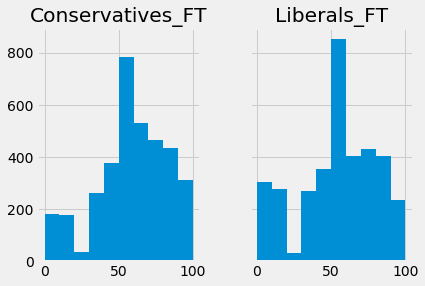

In [91]:
aniket_df.hist(sharex=True, sharey=True)

**Visually the two feeling thermometers are not too different. This fits with Phil Converse (1964) who contended that most voters don't really think about ideologies but rather think about groups. So these are sort of normally distributed but not really, and there is a mode right in the middle; most people just don't have much affect toward liberals and conservatives (although it looks like conservatives might be a more meaningful category.**

### Question 4

Now write code to do a t-test between liberal and conservative. For the t-test to work, you have to remove NaN values first (Check pandas documentation to find out how to do so).
**it may be better to look at distribution of an opinion between groups**

In [92]:
# Drop NaN
ideology_df.dropna(inplace=True) #need arg for inplace to get rid of rows with NaN values
aniket_df.dropna(inplace=True)

In [93]:
# t-test
print(ideology_df.loc[:,'Liberals_FT'].mean())
print(ideology_df.loc[:,'Conservatives_FT'].mean())
print(ideology_df.loc[:,'Liberals_FT'].size)
print(ideology_df.loc[:,'Conservatives_FT'].size)
stats.ttest_ind(ideology_df.loc[:,'Liberals_FT'],ideology_df.loc[:,'Conservatives_FT'])

51.78881469115192
56.40428491930996
3594
3594


Ttest_indResult(statistic=-7.560136303239192, pvalue=4.526154250948638e-14)

In [95]:
#t-test taking all values below 150
print(aniket_df.loc[:,'Liberals_FT'].mean())
print(ideology_df.loc[:,'Conservatives_FT'].mean())
print(ideology_df.loc[:,'Liberals_FT'].size)
print(ideology_df.loc[:,'Conservatives_FT'].size)
stats.ttest_ind(aniket_df.loc[:,'Liberals_FT'], aniket_df.loc[:,'Conservatives_FT'])

51.5266404935502
56.40428491930996
3594
3594


Ttest_indResult(statistic=-7.614943160878035, pvalue=2.978245385237987e-14)

What does the pvalue of this t-test indicate? Can we reject the null hypothesis that the mean of the two distributions is the same between samples?

**The t-test indicates that we can reject the null hypothesis that the samples represent the same underlying population.**

## Central Limit Theorem

The central limit theorem (CLT) is a fundamental concept in statistics. It basically says that the means of repeated samples will converge upon a normal distribution centered around the population mean. This is a powerful result that allows us to use a sample mean without measuring other sample means. This insight is particularly important in the social sciences, and justifies the use of regression for causal inference.

Using liberal respondents ("post_liberal_rating") again, let's illustrate this concept. Write code that does the following:

1. Define a sample size, and number of repetitions. Also, create an empty array to store the sample means.

2. Write a for loop that loops over the number of repetitions and:
    a. Samples the liberal respondents by the sample size
    b. Calculates its mean
    c. Appends the calculated mean to the array that stores sample means

Using this code, experiment with various sample sizes and number of repetitions. Plot each result. For instance, try the following:

1. Sample size = 20, repetititon = 10
2. Sample size = 100, repetitions = 10
3. Sample size = 100, repetitions = 100000
4. Sample size = 500, repetitions = 100000
5. Sample size = 1000, repetitions = 150000

Text(0.5,1,'Sample Size 20 Repetitions 10')

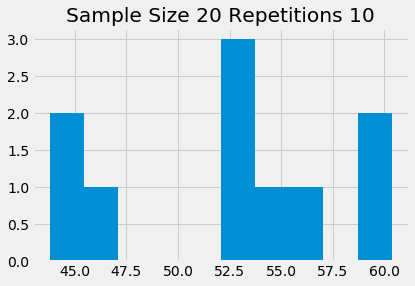

In [107]:
# function that takes a series, a sample size, and number of draws and adds the sample means to an array of means

def draw_means(series, sample_size, repetitions):
    sample_means = []
    for i in range(repetitions):
        one_mean = np.mean(series.sample(n=sample_size, replace=True))
        sample_means.append(one_mean)
    return sample_means

plot.hist(draw_means(aniket_df.loc[:,'Liberals_FT'], 20, 10))
plot.title('Sample Size 20 Repetitions 10')

Text(0.5,1,'Sample Size 100 Repetitions 10')

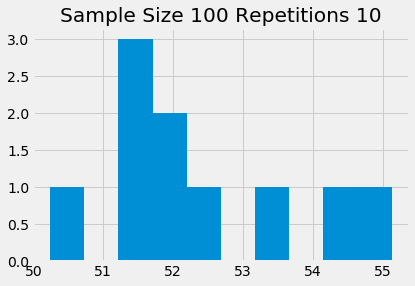

In [108]:
plot.hist(draw_means(aniket_df.loc[:,'Liberals_FT'], 100, 10))
plot.title('Sample Size 100 Repetitions 10')

Text(0.5,1,'Sample Size 100 Repetitions 100000')

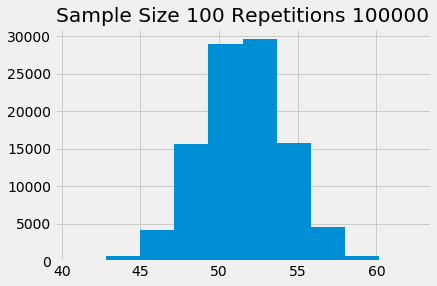

In [109]:
plot.hist(draw_means(aniket_df.loc[:,'Liberals_FT'], 100, 100000))
plot.title('Sample Size 100 Repetitions 100000')

Text(0.5,1,'Sample Size 500 Repetitions 100000')

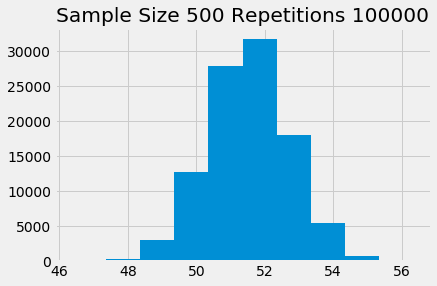

In [110]:
plot.hist(draw_means(aniket_df.loc[:,'Liberals_FT'], 500, 100000))
plot.title('Sample Size 500 Repetitions 100000')

Text(0.5,1,'Sample Size 1000 Repetitions 150000')

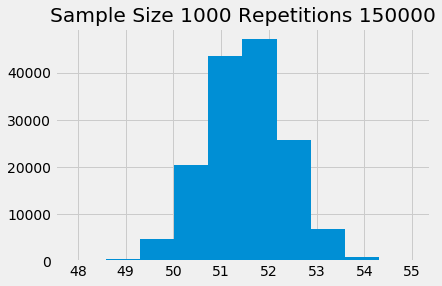

In [111]:
plot.hist(draw_means(aniket_df.loc[:,'Liberals_FT'], 1000, 150000))
plot.title('Sample Size 1000 Repetitions 150000')

### Question 5: What happens as you increase the sample size and number of repetitions? How does this property justify the use of statistical methods across a range of problems?

**As you increase the sample size, and the number of repetitions, the distribution of means converges on the population mean. You can actually see the Central Limit Theorem in action! This justifies the use of statistical methods because you can show that the sample mean represents the underlying population mean after repeated sampling. You can take advantage of the known properties of drawing a random sample to make inferences about a population (that's the whole basis of frequentist statistics).**